In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_air = pd.read_csv('/content/Air_Quality_Measures_on_the_National_Environmental_Health_Tracking_Network.csv')

In [ ]:
df_air.head()

,MeasureId,MeasureName,MeasureType,StratificationLevel,StateFips,StateName,CountyFips,CountyName,ReportYear,Value,Unit,UnitName,DataOrigin,MonitorOnly
0,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1.0,Alabama,1027.0,Clay,1999.0,33.0,No Units,No Units,Monitor Only,1.0
1,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1.0,Alabama,1051.0,Elmore,1999.0,5.0,No Units,No Units,Monitor Only,1.0
2,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1.0,Alabama,1073.0,Jefferson,1999.0,39.0,No Units,No Units,Monitor Only,1.0
3,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1.0,Alabama,1079.0,Lawrence,1999.0,28.0,No Units,No Units,Monitor Only,1.0
4,83,Number of days with maximum 8-hour average ozo...,Counts,State x County,1.0,Alabama,1089.0,Madison,1999.0,31.0,No Units,No Units,Monitor Only,1.0


In [ ]:
df_air.isnull()

,MeasureId,MeasureName,MeasureType,StratificationLevel,StateFips,StateName,CountyFips,CountyName,ReportYear,Value,Unit,UnitName,DataOrigin,MonitorOnly
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10133,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10134,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10135,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10136,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df_air['Value'], bins=50, kde=True)
plt.title('Distribution of Air Quality Measure Values')
plt.xlabel('Value')
plt.ylabel('Frequency (log scale)')
plt.yscale('log')
plt.savefig('value_distribution.png')
plt.close()

In [ ]:
yearly_avg_value = df_air.groupby('ReportYear')['Value'].mean().reset_index()

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_avg_value, x='ReportYear', y='Value')
plt.title('Average Air Quality Measure Value Over Years')
plt.xlabel('Report Year')
plt.ylabel('Average Value')
plt.grid(True)
plt.savefig('average_value_over_years.png')
plt.close()

In [ ]:
avg_value_by_measure = df_air.groupby('MeasureName')['Value'].mean().reset_index()

/tmp/ipython-input-3839484814.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_value_by_measure, x='Value', y='MeasureName', palette='viridis')


<function matplotlib.pyplot.close(fig: "None | int | str | Figure | Literal['all']" = None) -> 'None'>

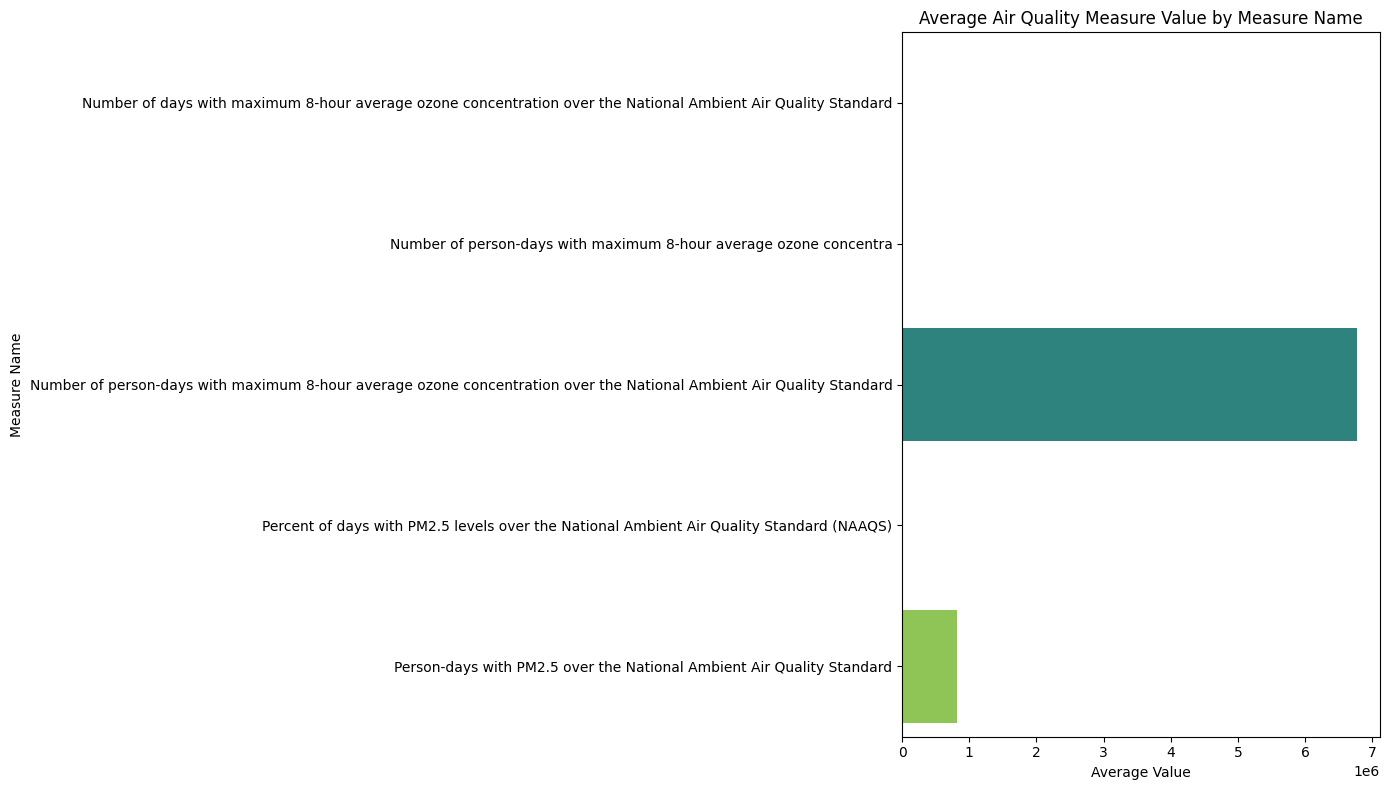

In [ ]:
plt.figure(figsize=(14, 8))
sns.barplot(data=avg_value_by_measure, x='Value', y='MeasureName', palette='viridis')
plt.title('Average Air Quality Measure Value by Measure Name')
plt.xlabel('Average Value')
plt.ylabel('Measure Name')
plt.tight_layout() # Adjusts plot to prevent labels from overlapping
plt.savefig('average_value_by_measure_name.png')
plt.close

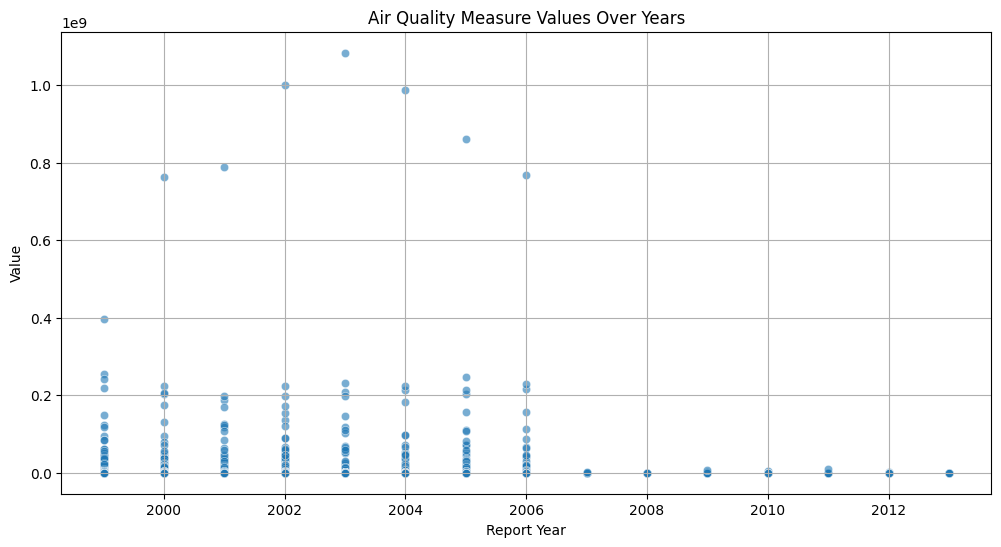

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_air, x='ReportYear', y='Value', alpha=0.6)
plt.title('Air Quality Measure Values Over Years')
plt.xlabel('Report Year')
plt.ylabel('Value')
plt.grid(True)
plt.show()

In [ ]:
avg_value_by_state = df_air.groupby('StateName')['Value'].mean().reset_index()
top_10_states = avg_value_by_state.sort_values(by='Value', ascending=False).head(10)

In [ ]:
plt.figure(figsize=(12, 7))
sns.barplot(data=top_10_states, x='Value', y='StateName', palette='viridis')
plt.title('Top 10 States by Average Air Quality Measure Value')
plt.xlabel('Average Value')
plt.ylabel('State Name')
plt.tight_layout()
plt.savefig('top_10_states_by_avg_value.png')
plt.close()

/tmp/ipython-input-686413176.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_states, x='Value', y='StateName', palette='viridis')


In [ ]:
bottom_10_states = avg_value_by_state.tail(10).reset_index()

In [ ]:
plt.figure(figsize=(12, 7))
sns.barplot(data=bottom_10_states, x='Value', y='StateName', palette='magma')
plt.title('Bottom 10 States by Average Air Quality Measure Value')
plt.xlabel('Average Value')
plt.ylabel('State Name')
plt.tight_layout()
plt.savefig('bottom_10_states_by_avg_value.png')
plt.close()

/tmp/ipython-input-873081786.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom_10_states, x='Value', y='StateName', palette='magma')
